# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
import statsmodels.stats as sms
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:
fifa = pd.read_csv('https://raw.githubusercontent.com/eduardoheros/lab-correlation-tests-with-scipy/master/your-code/fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
fifa.Value.unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [5]:
def string2numeric(x):
  m=re.compile("[€M]")
  k=re.compile("K")
  x=re.sub(m,"",x)
  if "K" in x:
    x=re.sub(k,"",x)
    return float(x)/1000
  else:
    return float(x)

In [6]:
fifa["ValueNumeric"]=fifa.Value.apply(string2numeric)

In [7]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.50
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.00
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.50
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.00
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,54.0,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,0.06
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,41.0,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,0.06
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,70.0,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,0.06
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,61.0,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,0.06


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [8]:
formula = 'ValueNumeric ~ C(Position) + C(fifa["Preferred Foot"])'
lm = smf.ols(formula, fifa).fit()
sms.anova.anova_single(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(Position),26.0,16496.092002,634.465077,20.791849,5.031960e-96
"C(fifa[""Preferred Foot""])",1.0,234.162243,234.162243,7.673655,5.608990e-03
Residual,18119.0,552902.860021,30.515087,NaN,NaN


What is your conclusion from this ANOVA?

In [9]:
##La posición y fenotipo combinados influyen en el valor de un jugador para niveles de significancia bajos


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [10]:
formula="ValueNumeric ~ C(Nationality)"
lm = smf.ols(formula, fifa).fit()
sms.anova.anova_single(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,32812.244217,201.302112,6.762478,4.840477e-134
Residual,18043.0,537095.118316,29.767506,NaN,NaN


What is your conclusion from this ANOVA?

In [11]:
##La nacionalidad también influye en el valor de un jugador

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [12]:
fifa.dropna(inplace=True)

In [13]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            17918 non-null  object 
 1   Age             17918 non-null  int64  
 2   Nationality     17918 non-null  object 
 3   Overall         17918 non-null  int64  
 4   Potential       17918 non-null  int64  
 5   Club            17918 non-null  object 
 6   Value           17918 non-null  object 
 7   Preferred Foot  17918 non-null  object 
 8   Position        17918 non-null  object 
 9   Weak Foot       17918 non-null  float64
 10  Acceleration    17918 non-null  float64
 11  SprintSpeed     17918 non-null  float64
 12  Stamina         17918 non-null  float64
 13  Strength        17918 non-null  float64
 14  LongShots       17918 non-null  float64
 15  Aggression      17918 non-null  float64
 16  Interceptions   17918 non-null  float64
 17  Positioning     17918 non-null 

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [17]:
x=sm.add_constant(fifa[["Stamina","SprintSpeed"]])
y=fifa.ValueNumeric
print(sm.OLS(y,x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Fri, 03 Jul 2020   Prob (F-statistic):          8.04e-193
Time:                        18:29:11   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [18]:
##De acuerdo con Ad. R-cuadrada, no hay un buen ajuste entre estas variables por lo cual se descarta.


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [31]:
x=sm.add_constant(fifa.Potential)
y=fifa.ValueNumeric
print(sm.OLS(y,x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Fri, 03 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:21:48   Log-Likelihood:                -52728.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4390      0.400    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [50]:
#Adj. R-cuadrada nos muestra que existe una posible relación entre variables, aunque es menor a 0.5 por lo cual da una impresión de no ser una relación muy clara

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

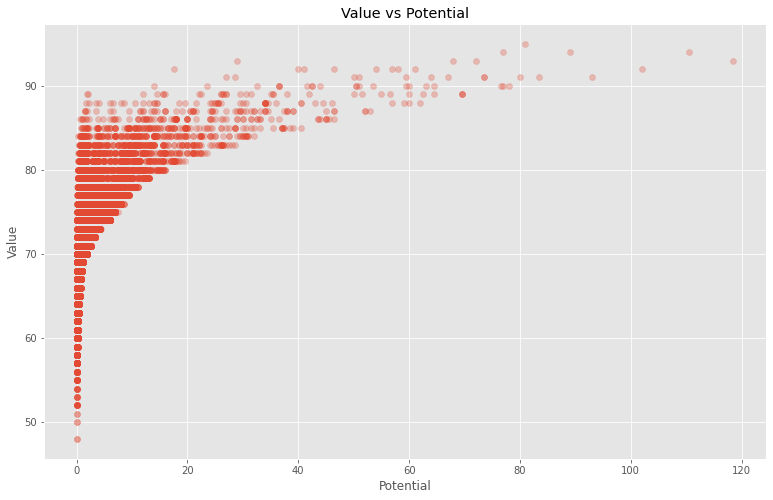

In [48]:
plt.style.use("ggplot")
plt.figure(figsize=(8*1.618,8))
plt.scatter(y,fifa.Potential,alpha=0.3)
plt.title("Value vs Potential")
plt.ylabel("Value")
plt.xlabel("Potential");

In [ ]:
##De acuerdo a la gráfica, se observa que existe una relación entre Potencial y Valor, sin embargo, no parece que sea una relación del tipo lineal, en cuanto más aumenta el valor, más rápido aumental el potencial, 